<center>
    <h1> INF393 - Máquinas de Aprendizaje  </h1>
    <h2> Tarea 1 </h2>
    <h3> Universidad Técnica Federico Santa Maria </h3>
    
</center>

_Octubre 2017_
<p>Profesor: R. Ñanculef</p>
 <p>Ayudante: Francisco Mena</p>
 <p>Integrantes: 
 <br>Alfredo Silva,
 201373511-8</br>
 <br>Fernando Llorens, 201373528-2</br>
 

 
</p>

<h1>1 Regresión Lineal Ordinaria (LSS)</h1>
<p>En esta sección trabajaremos con un dataset conocido como House Sales in King County, USA, presentado en la plataforma de Kaggle, el cual es un gran dataset para evaluar simples modelos de regresión. Los registros contienen distintas características asociadas a las ventas de casas en la localidad King County, entre mayo de 2014 y mayo de 2015, las cuales vienen descritas en el dataset, como la cantidad de habitaciones, cantidad de baños, número de pisos, etc. Donde una de las variables a estudiar corresponde al precio en el cual se vendió la casa.</p>
<h2>Construcción del dataframe</h2>

<p><b>a) Construya un dataframe con los datos a analizar descargándolos desde la plataforma como se indicó.Explique por qué se realiza la línea 4.</b> </p>
<p>
Se hace uso de la cuarta línea, porque los datos eliminados son inutiles para realizar la regresión (no son númericos o son números de registros), además son datos aleatorios con respecto a las características de una casa, o sea, no aportan información para el precio de una casa</p>

In [39]:
import pandas as pd
import numpy as np
df = pd.read_csv("kc_house_data.csv")
df.drop(['id','date','zipcode',],axis=1,inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


<p><b>b) Describa brevemente el dataset a utilizar.</b> Son 21.600 casas, las cuales sond escritas a través de 18 caracteristicas de las cuales 5 corresponden a números flotantes o reales y 13 a enteros.</p>

In [40]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(13)
memory usage: 3.0 MB


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


<p><b>c) Normalice los datos antes de trabajar y aplique una transformación adecuada a la variable a predecir.
Explique la importancia/conveniencia de realizar estas dos operaciones.
</b></p>

<p>La importancia de normalizar los datos recae principalmente en hacer que estos sean más fácil de manejar para la máquina de aprendizaje, disminuyendo así la complejidad de los computos. Por otro lado, al precio se le hizo un reajuste logarítmico debido a que este presentaba una distribución en extremo compacta, de esta forma aplicando la transformación se redistribuyeron los datos de mejor forma en torno a la media, se adjuntan un grupo de gráficos: dos Boxplot y dos Histogramas, cada par representando el precio antes y después de la transformación.</p>

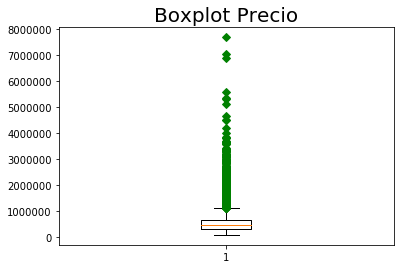

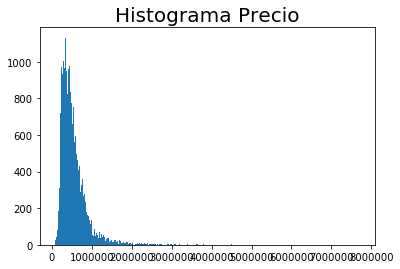

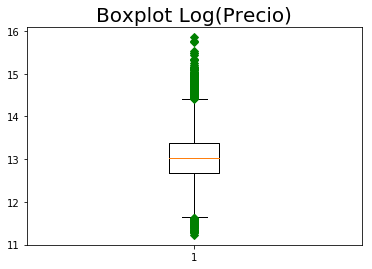

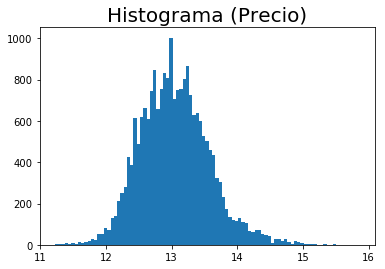

In [51]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

plt.figure()
plt.boxplot(df['price'], 0, 'gD')
plt.title("Boxplot Precio", size=20)
plt.show()


plt.hist(df['price'], bins='auto')  # arguments are passed to np.histogram
plt.title("Histograma Precio", size=20)
plt.show()

df_scaled['price'] = np.log(df['price'])

plt.figure()
plt.boxplot(df_scaled['price'], 0, 'gD')
plt.title("Boxplot Log(Precio)", size=20)
plt.show()


plt.hist(df_scaled['price'], bins='auto')  # arguments are passed to np.histogram
plt.title("Histograma (Precio)", size=20)
plt.show()

<p><b>d) Realice una regresión lineal de mínimos cuadrados básica. Explique la importancia/conveniencia del paso 4 y los argumentos que se deben entregar a la función que implementa la regresión lineal.
</b>
</p>
<p>Se hace esto, porque se incluye el intercepto dentro del vector de coeficientes y agregandose una columna de 1 en los atributos, de esta manera la expresion de la regresión lineal se reduce a un producto punto de dos vectores sin una suma extra.
Lo anterior se puede ver claramente si se analiza la línea "<b>linreg = lm.LinearRegression(fit_intercept = False)</b>", donde se apaga la opción de realizar el <i>fit</i> del intercepto en el modelo.</p>

In [42]:
import sklearn.linear_model as lm
X = df_scaled.iloc[:,1:]
N = X.shape[0]
X.insert(X.shape[1],'intercept',np.ones(N))#Explicar esto
y = df_scaled['price']
#Mascara estatica con el 70% de los datos
mascara = np.zeros(len(X))
limit = int(len(X)*0.7)
mascara[:limit] = 1
istrain = mascara == 1
Xtrain = X[istrain]
ytrain = y[istrain]
Xtest = X[np.logical_not(istrain)]
ytest = y[np.logical_not(istrain)]
linreg = lm.LinearRegression(fit_intercept = False)
linreg.fit(Xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

<p><b>e) Construya una tabla con los pesos y Z-score correspondientes a cada predictor (variable). ¿Qué variables están más correlacionadas con la respuesta? Si usáramos un nivel de significación del 5%. ¿Qué es lo
que observa y cuál puede ser la causa?</b></p>
<p>Los atributos que están más relacionadas con la respuesta son: latitud, el año de construcción y numero de pisos, en ese orden. La distancia entre los valores más pequeños y los más grandes es demaciada, puede suceder porque la matriz está mal condicionada a la solución que se intenta darle.</p>

In [44]:
#print(linreg.coef_) #estos son los b_j
linreg = lm.LinearRegression(fit_intercept = False)
linreg.fit(Xtrain,ytrain)
coefs = linreg.coef_
suma = 0
valores = Xtrain.values
ygorro = linreg.predict(Xtrain)
for i in range(len(ytrain)):
    sig = ytrain[i] - ygorro[i]
    suma+= sig*sig
Sigma = np.sqrt(suma/(len(ytrain)-1))
print("desviacion estandar:"+ str(Sigma))
XtX = np.dot(np.transpose(Xtrain),Xtrain)#X tranpuesta punto X
XtX_inv = np.linalg.inv(XtX)#Invertida de lo anterior
Zscore = []
n = limit
for i in range(len(coefs)):
    score = coefs[i]/(Sigma*np.sqrt(XtX_inv[i][i]))
    Zscore.append(score)
Zscore2=map(abs,Zscore)
sum2 =sum(Zscore2)
caracteristicas=['bedrooms', 'bathrooms','sqft_living','sqft_lot',         
                 'floors','waterfront','view','condition','grade', 
                 'sqft_above','sqft_basement','yr_built','yr_renovated',
                 'lat','long','sqft_living15','sqft_lot15']
#for i in range(len(caracteristicas)):
#    print(caracteristicas[i]+': '+str((Zscore2[i])/sum2))
print('<table style="width:100%">'+
      "<tr>"+
      "<th>Atributo</th>"+
      "<th>Bj</th>"+
      "<th>Z-score</th>"+
      "<th>Cota Inferior</th>"+
      "<th>Cota Superior</th>"+
      "<th>Aceptado?</th>"+
      "</tr>")
    
for i in range(len(caracteristicas)):
    i = int(i)
    cota_inferiorScore = coefs[i]-1.645*np.sqrt(XtX_inv[i][i])*Sigma
    #cota_inferiorScore = coefs[i]-Zscore2[i]*np.sqrt(XtX_inv[i][i])*Sigma
    cota_superiorScore = coefs[i]+1.645*np.sqrt(XtX_inv[i][i])*Sigma
    #cota_superiorScore = coefs[i]+Zscore2[i]*np.sqrt(XtX_inv[i][i])*Sigma
    
    print("<tr>"+
          "<td>"+str(caracteristicas[i])+"</td>"+
          "<td>"+str(coefs[i])+"</td>"+
          "<td>"+str(Zscore[i])+"</td>"+
          "<td>"+str(cota_inferiorScore)+"</td>"+
          "<td>"+str(cota_superiorScore)+"</td>")
#    print("Z=0.95")
#    print(str(coefs[i])+': ['+str(coefs[i]-1.645*np.sqrt(XtX_inv[i][i])*Sigma) +', '+str(coefs[i]+1.645*np.sqrt(XtX_inv[i][i])*Sigma)+']')
    #if coefs[i]> cota_inferiorZ and coefs[i]< cota_superiorZ:
        
    #else:
    #    print(caracteristicas[i]+" false")
        
    #print("ZScore")
    #print(str(coefs[i])+': ['+str(coefs[i]-Zscore2[i]*np.sqrt(XtX_inv[i][i])*Sigma) +', '+str(coefs[i]+Zscore2[i]*np.sqrt(XtX_inv[i][i])*Sigma)+']')
    if coefs[i]> cota_inferiorScore and coefs[i]<cota_superiorScore:
        print("<td>true</td>"+"</tr>")
    else:
        print("<td>false</td>"+"</tr>")
        
print("</table>")

desviacion estandar:0.25404150937
<table style="width:100%"><tr><th>Atributo</th><th>Bj</th><th>Z-score</th><th>Cota Inferior</th><th>Cota Superior</th><th>Aceptado?</th></tr>
<tr><td>bedrooms</td><td>-0.00712459370918</td><td>-2.61511590307</td><td>-0.0142491874184</td><td>0.0</td>
<td>true</td></tr>
<tr><td>bathrooms</td><td>0.0570425381022</td><td>14.9465973118</td><td>0.0</td><td>0.114085076204</td>
<td>true</td></tr>
<tr><td>sqft_living</td><td>-3.54349922406e+12</td><td>-26304513.341</td><td>-7.08699844811e+12</td><td>0.0</td>
<td>true</td></tr>
<tr><td>sqft_lot</td><td>0.0224926906589</td><td>7.71533714696</td><td>-3.46944695195e-18</td><td>0.0449853813178</td>
<td>true</td></tr>
<tr><td>floors</td><td>0.0371899890854</td><td>12.1435073201</td><td>0.0</td><td>0.0743799781707</td>
<td>true</td></tr>
<tr><td>waterfront</td><td>0.0333063586831</td><td>14.6955326148</td><td>0.0</td><td>0.0666127173662</td>
<td>true</td></tr>
<tr><td>view</td><td>0.0424233606313</td><td>17.5397739434

<table style="width:100%"><tr><th>Atributo</th><th>Bj</th><th>Z-score</th><th>Cota Inferior</th><th>Cota Superior</th><th>Aceptado?</th></tr>
<tr><td>bedrooms</td><td>-0.00712459370918</td><td>-2.61511590307</td><td>-0.0142491874184</td><td>0.0</td>
<td>true</td></tr>
<tr><td>bathrooms</td><td>0.0570425381022</td><td>14.9465973118</td><td>0.0</td><td>0.114085076204</td>
<td>true</td></tr>
<tr><td>sqft_living</td><td>-3.54349922406e+12</td><td>-26304513.341</td><td>-7.08699844811e+12</td><td>0.0</td>
<td>true</td></tr>
<tr><td>sqft_lot</td><td>0.0224926906589</td><td>7.71533714696</td><td>-3.46944695195e-18</td><td>0.0449853813178</td>
<td>true</td></tr>
<tr><td>floors</td><td>0.0371899890854</td><td>12.1435073201</td><td>0.0</td><td>0.0743799781707</td>
<td>true</td></tr>
<tr><td>waterfront</td><td>0.0333063586831</td><td>14.6955326148</td><td>0.0</td><td>0.0666127173662</td>
<td>true</td></tr>
<tr><td>view</td><td>0.0424233606313</td><td>17.5397739434</td><td>0.0</td><td>0.0848467212626</td>
<td>true</td></tr>
<tr><td>condition</td><td>0.0457586742856</td><td>20.7651082492</td><td>0.0</td><td>0.0915173485712</td>
<td>true</td></tr>
<tr><td>grade</td><td>0.184422999809</td><td>47.6285288352</td><td>0.0</td><td>0.368845999617</td>
<td>true</td></tr>
<tr><td>sqft_above</td><td>3.19491406164e+12</td><td>26304513.341</td><td>0.0</td><td>6.38982812328e+12</td>
<td>true</td></tr>
<tr><td>sqft_basement</td><td>1.70752884084e+12</td><td>26304513.341</td><td>0.0</td><td>3.41505768168e+12</td>
<td>true</td></tr>
<tr><td>yr_built</td><td>-0.110107421875</td><td>-33.8777920249</td><td>-0.22021484375</td><td>0.0</td>
<td>true</td></tr>
<tr><td>yr_renovated</td><td>0.0146484375</td><td>6.8232816935</td><td>0.0</td><td>0.029296875</td>
<td>true</td></tr>
<tr><td>lat</td><td>0.185791015625</td><td>85.6111116835</td><td>0.0</td><td>0.37158203125</td>
<td>true</td></tr>
<tr><td>long</td><td>-0.0042724609375</td><td>-1.66599099671</td><td>-0.008544921875</td><td>0.0</td>
<td>true</td></tr>
<tr><td>sqft_living15</td><td>0.0882568359375</td><td>24.2174142361</td><td>0.0</td><td>0.176513671875</td>
<td>true</td></tr>
<tr><td>sqft_lot15</td><td>-0.0081787109375</td><td>-2.73828376574</td><td>-0.016357421875</td><td>-1.73472347598e-18</td>
<td>true</td></tr>
</table>


In [62]:
import numpy.linalg as linalg
eigen = linalg.eigvals(XtX)
print(eigen)

covX = np.cov(XtX_inv)
print(covX)
for i in range(len(covX[0])):
    print("Cov[%d][%d] = %f"%(i,i,covX[i][i]))
    

[[  2.28935078e-09  -6.04099539e-09   3.43594320e+06  -1.46795931e-10
    1.01892448e-09   2.27503233e-10  -2.29093447e-10   1.31335524e-10
   -2.24708426e-09  -3.09793866e+06  -1.65570013e+06   2.08369317e-09
    3.28547324e-10   4.54988314e-10  -8.35833989e-11  -2.73171303e-09
   -1.05397573e-10  -3.06718612e-10]
 [ -6.04099539e-09   2.72584872e-08  -1.49694108e+07   7.05913312e-10
   -4.72767460e-09  -7.51899533e-10   1.37265084e-09  -9.42148123e-10
    1.22023068e-08   1.34968228e+07   7.21340662e+06  -1.00464933e-08
   -1.54932949e-09  -1.99997853e-09   4.77403487e-10   1.29430243e-08
    9.67225067e-10   1.23319960e-09]
 [  3.43594320e+06  -1.49694108e+07   9.47379990e+21  -4.79202995e+05
    2.42126808e+06   4.73666851e+05  -9.00836910e+05   4.03679320e+05
   -7.81208332e+06  -8.54183241e+21  -4.56520110e+21   5.41332703e+06
    7.21269279e+05   1.19281025e+06  -1.69967767e+05  -8.00347629e+06
   -5.40643566e+05  -8.11068411e+05]
 [ -1.46795931e-10   7.05913312e-10  -4.79202995e

<p>Se ve claramente que el ultimo valor propio es en extremo cercano a 0 en comparación a los otros, indicando que dos atributos estan muy ligados uno del otro, aproximadose peligrosamente a una dependencia lineal. Lo que genera problemas, pues la matriz está mal condicionada. Esta es la razon por la que los coeficientes y Z-scores varían tanto.</p>
<p>Si se analiza la matriz de covarianza de la inversa de los atribustos al cuadrado ((X^T*X)^-1), se puede ver que los atributos número 2 (sqft_living), 9 (sqft_above) y 10 (sqft_basement), son linialmente dependientes. Por ende al menos uno de ellos podría escribirse como combinación lineal de los demás, generando la mal condición mencionada anteriormente.</p>

<p><b>f) Proponga un método para corregir lo observado (Hint: inspírese en los métodos de feature engineering
de las siguiente secciones). Verifíquelo mediante los Z-score presentados en la pregunta e).

</b></p>Habiendo hecho todo el análisis anterior, se podría eliminar al menos uno de los tres atributos para generar una matriz bien condicionada, arreglando así el problema.</p>


<p><b>g) Estime el error de predicción del modelo usando validación cruzada con un número de folds igual a K = 5 y K = 10. Recuerde que para que la estimación sea razonable, en cada configuración (fold) deberá
reajustar los pesos del modelo. Mida el error real del modelo sobre el conjunto de pruebas, compare y concluya. </b></p>

<p>Una vez realizado los entrenamientos, se obtiene que los errores se diferencian de manera marginal, es decir, sus valores son prácticamente idénticos (todos aproximados a 0.065). Esto puede suceder debido a la cantidad de datos con la cuál se trabajó, que comparada con la complejidad del modelo es más que suficiente para el entrenamieto, haciendo que Cross Validation se comporte de forma similar a Hold on Validation. Otra razón por la que pudo haber ocurrido esto es que el <i>split</i> que separo el conjunto de prueba y de entrenamiento fue muy afortunado, es decir, es un conjunto de entrenamieto muy representativo del problema, lo que provoca modelos de buenas predicciones.</p>

In [31]:
yhat_test = linreg.predict(Xtest)
mse_test = np.mean(np.power(yhat_test - ytest, 2))
print("Error real sin cross: "+str(mse_test))
Xm = Xtrain.as_matrix()
ym = ytrain.as_matrix()
print("############################")
from sklearn.model_selection import KFold

### Con K=10 ###############
kf = KFold(n_splits=10)
mse_cv = 0
mse_real10 = 0
for train, val in kf.split(Xm):
    linreg = lm.LinearRegression(fit_intercept = False)
    linreg.fit(Xm[train], ym[train])
    yhat_val = linreg.predict(Xm[val])
    mse_fold = np.mean(np.power(yhat_val - ym[val], 2))
    mse_cv += mse_fold
    
    yhat_test10 = linreg.predict(Xtest)
    mse_test10 = np.mean(np.power(yhat_test10 - ytest, 2))
    mse_real10+=mse_test10

mse_real10 /= 10
mse_cv = mse_cv / 10
print("Error real con K=10: "+str(mse_real10))
print("Error validacion con K=10: "+str(mse_cv))
print("############################")
### Con K=5 ################
kf = KFold(n_splits=5)
mse_cv = 0
mse_real5 = 0
for train, val in kf.split(Xm):
    linreg = lm.LinearRegression(fit_intercept = False)
    linreg.fit(Xm[train], ym[train])
    yhat_val = linreg.predict(Xm[val])
    mse_fold = np.mean(np.power(yhat_val - ym[val], 2))
    mse_cv += mse_fold
    yhat_test5 = linreg.predict(Xtest)
    mse_test5 = np.mean(np.power(yhat_test10 - ytest, 2))
    mse_real5+=mse_test5

mse_real5 /= 5
print("Error real con K=5: "+str(mse_real5))
mse_cv = mse_cv / 5
print("Error validacion con K=5: "+str(mse_cv))

Error real sin cross: 0.0654124075861
############################
Error real con K=10: 0.0653438332975
Error validacion con K=10: 0.0646905656615
############################
Error real con K=5: 0.065287831397
Error validacion con K=5: 0.0646902919559


<p><b>h) Mida los errores de predicción para cada dato de entrenamiento. Utilizando un “quantile-quantile plot”
determine si es razonable la hipótesis de normalidad sobre los residuos del modelo. </b></p>

In [64]:
linreg.fit(Xtrain,ytrain)
ygorro = linreg.predict(Xtrain)
errores= np.array(ygorro - ytrain)
print(errores[:5])

[ 0.26467037  0.12518303  0.84181421 -0.37402366 -0.20138985]


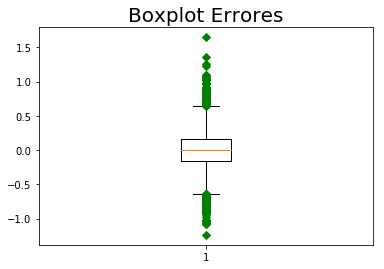

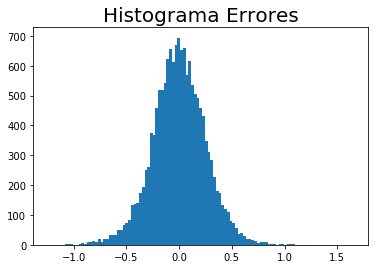

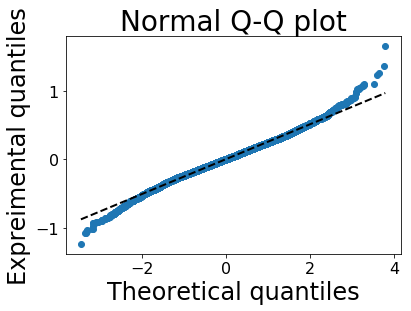

In [68]:
import numpy.random as random
import matplotlib.pyplot as plt

data=errores

data.sort()
norm=random.normal(0,1,len(data))
norm.sort()

plt.figure()
plt.boxplot(data, 0, 'gD')
plt.title("Boxplot Errores", size=20)
plt.show()


plt.hist(data, bins='auto')  # arguments are passed to np.histogram
plt.title("Histograma Errores", size=20)
plt.show()


plt.figure(figsize=(6,4),facecolor='1.0') 
plt.plot(norm,data,"o")

#generate a trend line as in http://widu.tumblr.com/post/43624347354/matplotlib-trendline
z = np.polyfit(norm,data, 1)
p = np.poly1d(z)
plt.plot(norm,p(norm),"k--", linewidth=2)
plt.title("Normal Q-Q plot", size=28)
plt.xlabel("Theoretical quantiles", size=24)
plt.ylabel("Expreimental quantiles", size=24)
plt.tick_params(labelsize=16)
plt.show()

<p> La hipótesis de normalidad es razonable debido a que ambas curvas tienen un similar comportamiento en gran parte de la distribución de datos. Las anomalías que se observan están dentro de lo esperado, y en parte puede ser explicado a los ajustes realizados en un principio (transformada logarítmica), además de que los resultados se obtuvieron sin eliminar los atributos que causaban ruido. </p>

<h2>Selección de atributos</h2>
<p><b>Utilizando el dataframe de la actividad anterior,</b></p>
<p><b>(a) Construya una función que implemente Forward Step-wise Selection (FSS). Es decir, partiendo con un
modelo sin predictores (variables), agregue un predictor a la vez, re-ajustando el modelo de regresión
en cada paso. Para seleccionar localmente una variable, proponga/implemente un criterio distinto al
utilizado en el código de ejemplo. Construya un gráfico que muestre el error de entrenamiento y el error
de pruebas como función del número de variables en el modelo. Ordene el eje x de menor a mayor.</b></p>

<p> Como se sabe  FSS permite trabajar con la selección de atributos determinandola importante de ellos y entre ellos para el modelo. Partiendo desde un atributo se comienza a realizar las distintas pruebas para determinar la importancia de otros atributos en el modelo. El algoritmo termina hasta que no quede ningún atributo sin visitar. Se propuso trabajar con norma laplaciana debido a que era una función simple de implementar y que generalmente se comporta bien, excepto en el punto de inflexión. Sin embargo, el coste de su simpleza de implementación recae en un mayor error obtenido.</p>

selected = grade ...
totalvars=2, mle = 0.302697, mle_test= 0.409675
selected = lat ...
totalvars=3, mle = 0.249518, mle_test= 0.290389
selected = sqft_living ...
totalvars=4, mle = 0.225651, mle_test= 0.244556
selected = yr_built ...
totalvars=5, mle = 0.211753, mle_test= 0.212163
selected = view ...
totalvars=6, mle = 0.206941, mle_test= 0.209820
selected = bathrooms ...
totalvars=7, mle = 0.204301, mle_test= 0.205280
selected = sqft_living15 ...
totalvars=8, mle = 0.202069, mle_test= 0.201974
selected = condition ...
totalvars=9, mle = 0.200426, mle_test= 0.202307
selected = floors ...
totalvars=10, mle = 0.198749, mle_test= 0.202293
selected = waterfront ...
totalvars=11, mle = 0.197509, mle_test= 0.198521
selected = sqft_lot ...
totalvars=12, mle = 0.197028, mle_test= 0.197339
selected = bedrooms ...
totalvars=13, mle = 0.196811, mle_test= 0.197311
selected = yr_renovated ...
totalvars=14, mle = 0.196634, mle_test= 0.197101
selected = sqft_basement ...
totalvars=15, mle = 0.196472

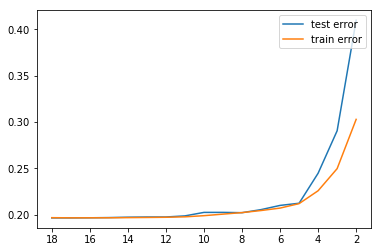

[17L, 8, 13, 2, 11, 6, 1, 15, 7, 4, 5, 3, 0, 12, 10, 16, 9, 14]

In [29]:
import matplotlib.pylab as plt
nytest = ytest.as_matrix()
nXtest = Xtest.as_matrix()
def fss(x, y, names_x, k = 10000):
    p = x.shape[1]-1
    k = min(p, k)
    names_x = np.array(names_x)
    remaining = range(0, p)
    selected = [p]
    current_score = best_new_score = 0.0
    lista_total=[]
    errores_mle=[]
    et=[]
    while remaining and len(selected)<=k :
        score_candidates = []
        score_t =[]
        for candidate in remaining:
            model = lm.LinearRegression(fit_intercept=False)
            indexes = selected + [candidate]
            x_train = x[:,indexes]
            x_test = nXtest[:,indexes]
            predictions_train = model.fit(x_train, y).predict(x_train)
            pred_t = model.fit(x_train, y).predict(x_test)
            residuals_t=map(abs,pred_t - nytest)
            laplace_t=np.mean(residuals_t)
            residuals_train = map(abs,predictions_train - y)
            #Residuo Laplaciano // de valor absoluto
            laplace_candidate = np.mean(residuals_train)
            score_candidates.append((laplace_candidate, candidate))
            score_t.append(laplace_t)
        score_candidates.sort()
        score_t.sort()
        mle_test=score_t.pop()
        et.append(mle_test) 
        score_candidates[:] = score_candidates[::-1]
        best_new_score, best_candidate = score_candidates.pop()
        remaining.remove(best_candidate)
        selected.append(best_candidate)
        lista_total.append(len(indexes))
        errores_mle.append(best_new_score)
        print "selected = %s ..."%names_x[best_candidate]
        print "totalvars=%d, mle = %f, mle_test= %f"%(len(indexes),best_new_score,mle_test)
    ax = plt.gca()
    
    ax.plot(lista_total,et,label='test error')
    ax.plot(lista_total,errores_mle,label='train error')
    plt.legend(loc=1)
    ax.set_xlim(ax.get_xlim()[::-1])
    plt.show()
    return selected
names_regressors = X.columns[:-1] #without intercept
Xm = Xtrain.as_matrix()
ym = ytrain.as_matrix()
fss(Xm,ym,caracteristicas)



selected = grade ...
totalvars=2, mse = 0.143260, mse_test= 0.278751
selected = lat ...
totalvars=3, mse = 0.103340, mse_test= 0.133102
selected = sqft_living ...
totalvars=4, mse = 0.084960, mse_test= 0.099389
selected = yr_built ...
totalvars=5, mse = 0.075447, mse_test= 0.075913
selected = view ...
totalvars=6, mse = 0.071782, mse_test= 0.073730
selected = sqft_living15 ...
totalvars=7, mse = 0.069979, mse_test= 0.070023
selected = bathrooms ...
totalvars=8, mse = 0.068251, mse_test= 0.070248
selected = condition ...
totalvars=9, mse = 0.066864, mse_test= 0.068622
selected = waterfront ...
totalvars=10, mse = 0.065836, mse_test= 0.068127
selected = floors ...
totalvars=11, mse = 0.065107, mse_test= 0.067240
selected = sqft_lot ...
totalvars=12, mse = 0.064820, mse_test= 0.065806
selected = yr_renovated ...
totalvars=13, mse = 0.064619, mse_test= 0.065759
selected = bedrooms ...
totalvars=14, mse = 0.064583, mse_test= 0.065541
selected = sqft_basement ...
totalvars=15, mse = 0.064554

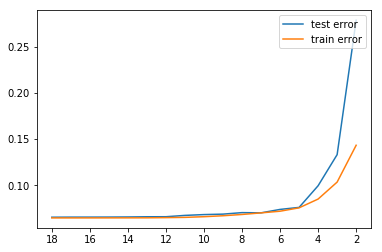

[17L, 8, 13, 2, 11, 6, 15, 1, 7, 5, 4, 3, 12, 0, 10, 16, 14, 9]

In [32]:
import matplotlib.pylab as plt
nytest = ytest.as_matrix()
nXtest = Xtest.as_matrix()
def fss(x, y, names_x, k = 10000):
    p = x.shape[1]-1
    k = min(p, k)
    names_x = np.array(names_x)
    remaining = range(0, p)
    selected = [p]
    current_score = best_new_score = 0.0
    lista_total=[]
    errores_mle=[]
    et=[]
    while remaining and len(selected)<=k :
        score_candidates = []
        score_t =[]
        for candidate in remaining:
            model = lm.LinearRegression(fit_intercept=False)
            indexes = selected + [candidate]
            x_train = x[:,indexes]
            x_test = nXtest[:,indexes]
            predictions_train = model.fit(x_train, y).predict(x_train)
            pred_t = model.fit(x_train, y).predict(x_test)
            #residuals_t=map(abs,pred_t - nytest)
            laplace_t=np.mean(np.power(pred_t - nytest,2))
            #residuals_train = map(abs,predictions_train - y)
            #Residuo Laplaciano // de valor absoluto
            laplace_candidate = np.mean(np.power(predictions_train - y,2))
            score_candidates.append((laplace_candidate, candidate))
            score_t.append(laplace_t)
        score_candidates.sort()
        score_t.sort()
        mle_test=score_t.pop()
        et.append(mle_test) 
        score_candidates[:] = score_candidates[::-1]
        best_new_score, best_candidate = score_candidates.pop()
        remaining.remove(best_candidate)
        selected.append(best_candidate)
        lista_total.append(len(indexes))
        errores_mle.append(best_new_score)
        print "selected = %s ..."%names_x[best_candidate]
        print "totalvars=%d, mse = %f, mse_test= %f"%(len(indexes),best_new_score,mle_test)
    ax = plt.gca()
    
    ax.plot(lista_total,et,label='test error')
    ax.plot(lista_total,errores_mle,label='train error')
    plt.legend(loc=1)
    ax.set_xlim(ax.get_xlim()[::-1])
    plt.show()
    return selected
names_regressors = X.columns[:-1] #without intercept
Xm = Xtrain.as_matrix()
ym = ytrain.as_matrix()
fss(Xm,ym,caracteristicas)


<p> Se realizó la curva de error vs la cantidad de atributos, tanto para el error laplaciano implementado como para el error cuadrático. En ambas curvas se puede apreciar que desde 6 atributos aproximadamente se encuentra minimizado el error y con 18 ya se encontraría minimizado totalmente puesto que ya abarca todos los atributos. Como se ve el error de prueba va ajustando al error de entrenamiento, hasta parecer una misma recta llegando a los 18 atributos. Lo que no ocurre es que el error de prueba debería volver a subir (formando una especie de U), lo cual se debe a la gran cantidad de datos que se tienen para analizar en tan solo 18 atributos.</p>

<h2>Regularización</h2>
<p><b>Utilizando el dataframe de la actividad anterior,</b></p>
<p><b>(a) Ajuste un modelo lineal utilizando “Ridge Regression”, es decir, regularizando con la norma l2. Utilice
valores del parámetro de regularización λ
‡
en el rango [10^7
, 10^1], variando si estima conveniente.
Construya un gráfico que muestre los coeficientes obtenidos como función del parámetro de regularización.
Describa lo que observa. (WARNING: Note que la línea 3 y el primer argumento en la línea 9
son críticos).</b></p>


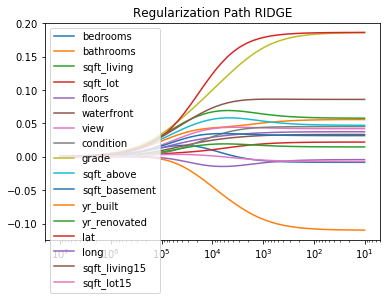

In [43]:
from sklearn.linear_model import Ridge
import matplotlib.pylab as plt
X2 = X.drop('intercept', axis=1,inplace=False)
Xtrain = X2[istrain]
ytrain = y[istrain]
names_regressors = X2.columns
alphas_ = np.logspace(7,1,base=10)
coefs = []
model = Ridge(fit_intercept=True,solver='svd')
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xtrain, ytrain)
    coefs.append(model.coef_)
ax = plt.gca()
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    plt.plot(alphas_, y_arr, label=label)
plt.legend()
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1]) # reverse axis
plt.title('Regularization Path RIDGE') 
plt.axis('tight')
plt.legend(loc=2)
plt.show()


<p> Todos los coeficientes se mitigan proporcionalmente al tamaño de λ, además se tienen presentes todos los atributos o ninguno. Se puede observar que los atributos que tienen más importancia en el modelo según el punto anterior son los que tienen una curva más amplia, ya que sus coeficientes afectan en gran medida al modelo. </p>

<p><b>(b) Ajuste un modelo lineal utilizando el método “Lasso”, es decir, regularizando con la norma l1. Utilice
valores del parámetro de regularización λ
§
en el rango [10^0
, 10^−3]. Para obtener el código, modifique
las líneas 7 y 9 del ejemplo anterior. Construya un gráfico que muestre los coeficientes obtenidos
como función del parámetro de regularización. Describa lo que observa. ¿Es más efectivo Lasso para
seleccionar atributos?</b></p>

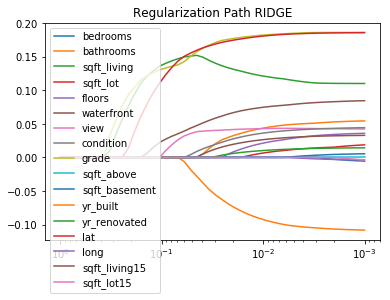

In [44]:
from sklearn.linear_model import Lasso
alphas_ = np.logspace(0,-3,base=10)
coefs = []
model = Lasso(fit_intercept=True)
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xtrain, ytrain)
    coefs.append(model.coef_)
ax = plt.gca()
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    plt.plot(alphas_, y_arr, label=label)
plt.legend()
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1]) # reverse axis
plt.title('Regularization Path LASSO') 
plt.axis('tight')
plt.legend(loc=2)
plt.show()

<p> Los atributos se mitigan independientemente de los demás, no necesariamente en todos los valores de  λ se obtiene la totalidad de atributos originales, de manera que Lasso es más efectivos para filtrar de manera definitiva los atributos. Se puede observar también que los atributos más importantes son casi los últimos en llegar a 0 con los valores más altos de λ, por lo que muestra la importancias de estos coeficientes para el modelo </p>

<p><b>(c) Escogiendo uno de los dos métodos regularizadores anteriores, especificando el porqué, construya un
gráfico que muestre el error de entrenamiento y el error de pruebas como función del parámetro de
regularización. Discuta lo que observa.</b></p>
<p>Escogemos Lasso, porque elimina los atributos que hacen ruido en el modelo y baja la dimensionalidad, en vez de reducir sus efectos como los hace Ridge. Esto produce una leve separación en las curvas de test error y train error, pero ambas mantienen un comportamiento similar.</p>

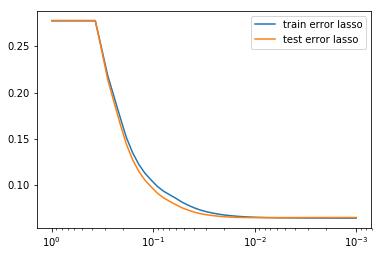

In [48]:
Xtest = X2[np.logical_not(istrain)]
ytest = y[np.logical_not(istrain)]
alphas_ = np.logspace(0,-3,base=10)
coefs = []
model = Lasso(fit_intercept=True)
mse_test = []
mse_train = []
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xtrain, ytrain)
    yhat_train = model.predict(Xtrain)
    yhat_test = model.predict(Xtest)
    mse_train.append(np.mean(np.power(yhat_train - ytrain, 2)))
    mse_test.append(np.mean(np.power(yhat_test - ytest, 2)))
ax = plt.gca()
ax.plot(alphas_,mse_train,label='train error lasso')
ax.plot(alphas_,mse_test,label='test error lasso')
plt.legend(loc=1)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.show()


<p><b> (d) Estime el valor del parámetro de regularización en alguno de los modelos anteriores haciendo uso de
la técnica validación cruzada </b></p>

In [49]:
##d con Lasso
def MSE(y,yhat): return np.mean(np.power(y-yhat,2))
Xm = Xtrain.as_matrix()
ym = ytrain.as_matrix()
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
best_cv_mse = float("inf")
model = Lasso(fit_intercept=True)
alphas_ = np.logspace(0,-3,base=10)
for a in alphas_:
    model.set_params(alpha=a)
    mse_list_k10 = [MSE(model.fit(Xm[train], ym[train]).predict(Xm[val]), ym[val]) \
                    for train, val in kf.split(Xm)]
    if np.mean(mse_list_k10) < best_cv_mse:
        best_cv_mse = np.mean(mse_list_k10)
        best_alpha = a
        print "BEST PARAMETER=%f, MSE(CV)=%f"%(best_alpha,best_cv_mse)


BEST PARAMETER=1.000000, MSE(CV)=0.277498
BEST PARAMETER=0.323746, MSE(CV)=0.248552
BEST PARAMETER=0.281177, MSE(CV)=0.218688
BEST PARAMETER=0.244205, MSE(CV)=0.196162
BEST PARAMETER=0.212095, MSE(CV)=0.173554
BEST PARAMETER=0.184207, MSE(CV)=0.151799
BEST PARAMETER=0.159986, MSE(CV)=0.135389
BEST PARAMETER=0.138950, MSE(CV)=0.122715
BEST PARAMETER=0.120679, MSE(CV)=0.113007
BEST PARAMETER=0.104811, MSE(CV)=0.105611
BEST PARAMETER=0.091030, MSE(CV)=0.098822
BEST PARAMETER=0.079060, MSE(CV)=0.093648
BEST PARAMETER=0.068665, MSE(CV)=0.089745
BEST PARAMETER=0.059636, MSE(CV)=0.085907
BEST PARAMETER=0.051795, MSE(CV)=0.081724
BEST PARAMETER=0.044984, MSE(CV)=0.078441
BEST PARAMETER=0.039069, MSE(CV)=0.075561
BEST PARAMETER=0.033932, MSE(CV)=0.073192
BEST PARAMETER=0.029471, MSE(CV)=0.071383
BEST PARAMETER=0.025595, MSE(CV)=0.069968
BEST PARAMETER=0.022230, MSE(CV)=0.068753
BEST PARAMETER=0.019307, MSE(CV)=0.067832
BEST PARAMETER=0.016768, MSE(CV)=0.067134
BEST PARAMETER=0.014563, MSE(CV)=0

In [50]:
##d con Ridge
def MSE(y,yhat): return np.mean(np.power(y-yhat,2))
Xm = Xtrain.as_matrix()
ym = ytrain.as_matrix()
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
best_cv_mse = float("inf")
model = Ridge(fit_intercept=True,solver='svd')
alphas_ = np.logspace(7,1,base=10)
for a in alphas_:
    model.set_params(alpha=a)
    mse_list_k10 = [MSE(model.fit(Xm[train], ym[train]).predict(Xm[val]), ym[val]) \
                    for train, val in kf.split(Xm)]
    if np.mean(mse_list_k10) < best_cv_mse:
        best_cv_mse = np.mean(mse_list_k10)
        best_alpha = a
        print "BEST PARAMETER=%f, MSE(CV)=%f"%(best_alpha,best_cv_mse)

BEST PARAMETER=10000000.000000, MSE(CV)=0.275499
BEST PARAMETER=7543120.063355, MSE(CV)=0.274855
BEST PARAMETER=5689866.029018, MSE(CV)=0.274008
BEST PARAMETER=4291934.260129, MSE(CV)=0.272894
BEST PARAMETER=3237457.542818, MSE(CV)=0.271436
BEST PARAMETER=2442053.094549, MSE(CV)=0.269531
BEST PARAMETER=1842069.969327, MSE(CV)=0.267057
BEST PARAMETER=1389495.494373, MSE(CV)=0.263865
BEST PARAMETER=1048113.134155, MSE(CV)=0.259777
BEST PARAMETER=790604.321091, MSE(CV)=0.254598
BEST PARAMETER=596362.331659, MSE(CV)=0.248125
BEST PARAMETER=449843.266897, MSE(CV)=0.240168
BEST PARAMETER=339322.177190, MSE(CV)=0.230586
BEST PARAMETER=255954.792270, MSE(CV)=0.219331
BEST PARAMETER=193069.772888, MSE(CV)=0.206492
BEST PARAMETER=145634.847750, MSE(CV)=0.192326
BEST PARAMETER=109854.114199, MSE(CV)=0.177258
BEST PARAMETER=82864.277285, MSE(CV)=0.161835
BEST PARAMETER=62505.519253, MSE(CV)=0.146650
BEST PARAMETER=47148.663635, MSE(CV)=0.132252
BEST PARAMETER=35564.803062, MSE(CV)=0.119077
BEST PA

<p> Se realizó con ambos métodos regularizadores y se llegó a casi el mismo valor de error (MSE) con el valor del parámetro regularizador más bajo que se podía utilizar. En otras palabras, el modelo ya es suficientemente bueno como para que sea mejorado con regularizadores; se podrían seguir quitando atributos y no se podría mejorar más de lo que ya se observó </p>

<h2>Drift</h2>
<p><b>En esta sección se presentarán dos muestras del dataframe utilizado en la actividades anteriores, donde cada
una de estas tiene una propiedad distinta ya que son muestreadas en funcóon del valor a predecir (logaritmo
del precio de la casa). Por una parte se tiene una pequeña muestra A, la cual es extraída directamente de
los datos con los que se trabaja (manteniendo la distribución de esta) y la muestra B, es generada con el
propósito de que en cada intervalo del rango de valores haya la misma cantidad de datos aproximadamente
(simulando una distribución uniforme). El objetivo es familiarizarse con el concepto de Transfer Learning.</b></p>

<p><b>En el siguiente código se generan las dos muestras con las que se trabajará.</b></p>

In [75]:
df_A = df_scaled.sample(1000,random_state=11)
frames = []
valor = df_scaled.price
length = 0.3
for z in np.arange(int(np.min(valor)),int(np.max(valor))+1,length):
    #un maximo de 100 datos por intervalo
    aux = df_scaled[(df_scaled.price >= z) & (df_scaled.price < z+length)].head(100)
    frames.append(aux)
df_B = pd.concat(frames).sample(1000,random_state=11) #crea el dataframe

<p><b>(a) Cree el conjunto de entrenamiento y otro de validación para trabajar cada muestra mediante la técnica
de hold out validation.</b></p>

In [76]:
X_A = df_A.iloc[:,1:].values
y_A = df_A.price
X_B = df_B.iloc[:,1:].values
y_B = df_B.price

from sklearn.model_selection import train_test_split
Xtrain_A,Xval_A,ytrain_A,yval_A = train_test_split(X_A, y_A, test_size=0.3, random_state=42)
Xtrain_B,Xval_B,ytrain_B,yval_B = train_test_split(X_B, y_B, test_size=0.3, random_state=42)


<p><b>(b) Evalúe los dos modelo de regresión lineal que se generan al entrenar con cada muestra. Mida el error
de cada modelo sobre ambos conjuntos de validación (A y B). Explique lo que observa.</b></p>

mse: 174.484191836


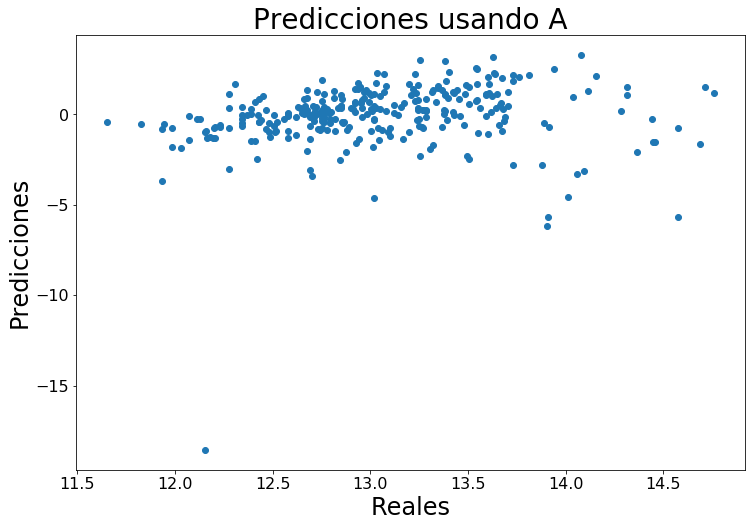

In [79]:
linreg = lm.LinearRegression(fit_intercept = False)
linreg.fit(Xtrain_A, ytrain_A)
yhat_val_A = linreg.predict(Xval_A)
mse = np.mean(np.power(yhat_val_A - yval_A, 2))
print("mse: "+str(mse))
import matplotlib.pylab as plt
plt.figure(figsize=(12,8),facecolor='1.0') 
plt.scatter(yval_A,yhat_val_A)
plt.title("Predicciones usando A", size=28)
plt.xlabel("Reales", size=24)
plt.ylabel("Predicciones", size=24)
plt.tick_params(labelsize=16)
plt.show()

mse: 125.825255554


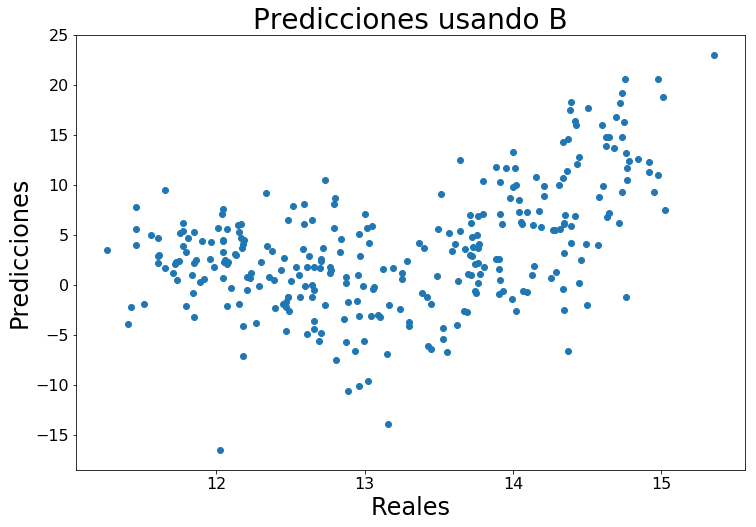

In [80]:
linreg = lm.LinearRegression(fit_intercept = False)
linreg.fit(Xtrain_B, ytrain_B)
yhat_val_B = linreg.predict(Xval_B)
mse = np.mean(np.power(yhat_val_B - yval_B, 2))
print("mse: "+str(mse)) 
import matplotlib.pylab as plt
plt.figure(figsize=(12,8),facecolor='1.0') 
plt.scatter(yval_B,yhat_val_B,)
plt.title("Predicciones usando B", size=28)
plt.xlabel("Reales", size=24)
plt.ylabel("Predicciones", size=24)
plt.tick_params(labelsize=16)
plt.show()

<p>Se escoge B como un mejor conjunto de datos de estudio. La razón principal es dada por el valor de mse, el cual nos puede decir que una vez realizada la RL, la distribución de los puntos sobre esta recta es de manera uniforme con la cantidad de datos por intervalo, no así en el modelo A, en donde se podría apreciar una mayor concentración de datos muy cerca de la emdiana de la recta.</p>
<p>En resumen, al estar concentrados los datos en un solo intervalo, como sucede en A, estos son los que regirán en su modelo, haciendo que los datos en las colas se vean afectados de mayor forma al predecir. En cambio, si se encuentran distribuidos de manera uniforme, como en B, los datos de todo el intervalo son mejor representados en el modelo final. Se puede ver claramente en los gráficos anteriores.</p>

<h2>Detectar enfermedades cardíacas</h2>
<p><b>En el área de la salud, diagnosticar a una persona de una enfermedad de forma rápida y correcta puede llegar
a salvarle la vida. Los encargados de realizar estos diagnósticos, son médicos que, observando exámenes y
ciertos indicadores, pueden concluir qué enfermedad presenta el paciente. Si el médico se llegase a equivocar,
aparte de que el paciente pueda perder la vida, el médico podría ser demandado por negligencia arriesgando
años de cárcel o pagar sumas de dinero considerable, es por estas razones que es importante no cometer
errores.
Pongámonos en el contexto de que usted es contratado para generar un modelo que prediga si es que un
paciente presenta una enfermedad cardiaca a partir de ciertos indicadores, tales como la edad, sexo, presión sanguínea, nivel de glicemia, etc.</b></p>

<p><b> a) Lea el archivo de datos, cárguelos en un dataframe o matriz, luego divida el dataframe en dos, un
dataframe de entrenamiento (70% Datos) y un dataframe de prueba (30% Datos). </b></p>

In [72]:
headers = ['age','sex','chest_pain','blood_p','serum','blood_s','electro','max_heart', 
             'angina','oldpeak','slope','vessel','thal','normal']
df = pd.read_csv("heart.dat", header=None, names=headers, sep=' ')
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
age           270 non-null float64
sex           270 non-null float64
chest_pain    270 non-null float64
blood_p       270 non-null float64
serum         270 non-null float64
blood_s       270 non-null float64
electro       270 non-null float64
max_heart     270 non-null float64
angina        270 non-null float64
oldpeak       270 non-null float64
slope         270 non-null float64
vessel        270 non-null float64
thal          270 non-null float64
normal        270 non-null int64
dtypes: float64(13), int64(1)
memory usage: 29.6 KB


,age,sex,chest_pain,blood_p,serum,blood_s,electro,max_heart,angina,oldpeak,slope,vessel,thal,normal
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000


<p><b>(b) Realice una regresión lineal y defina usted una frontera de decisión (umbral) para poder determinar si
es que estamos en presencia o no de una enfermedad cardíaca. Mida su desempeño con ambos conjuntos
de datos.</b></p>

mse: 464.659244023


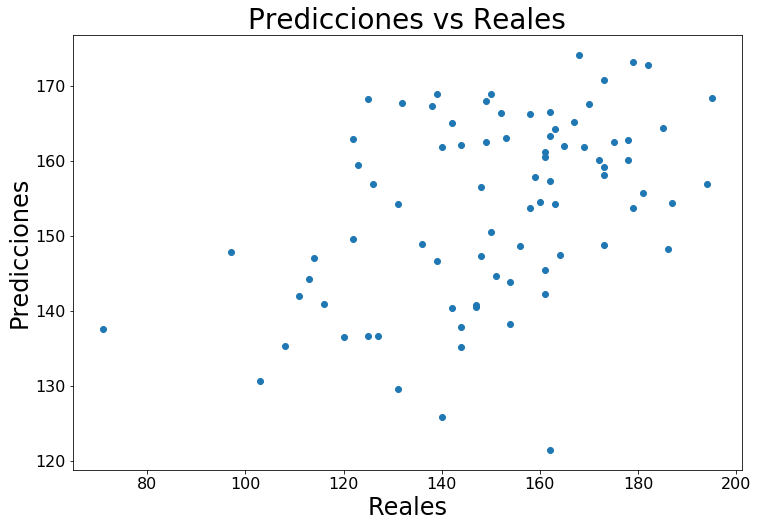

In [73]:
import sklearn.linear_model as lm
from sklearn.model_selection import train_test_split
y = df[['max_heart','normal']]

X = df[['age','sex','chest_pain','blood_p','serum','blood_s','electro','angina','oldpeak','slope','vessel','thal']]
N = X.shape[0]
X.insert(X.shape[1],'intercept',np.ones(N))

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)
ytrain = ytrain.as_matrix()
ytest = ytest.as_matrix()
ytrain_normal = ytrain[:,1]
ytrain_heart = ytrain[:,0]
ytest_normal = ytest[:,1]
ytest_heart = ytest[:,0]
linreg = lm.LinearRegression(fit_intercept = False)
linreg.fit(Xtrain,ytrain_heart)
predictions = linreg.predict(Xtest)
predent = linreg.predict(Xtrain)
mse = np.mean(np.power(predictions - ytest_heart,2))
print("mse: "+str(mse))

#para visualizar
plt.figure(figsize=(12,8),facecolor='1.0') 
plt.scatter(ytest_heart,predictions)
plt.title("Predicciones vs Reales", size=28)
plt.xlabel("Reales", size=24)
plt.ylabel("Predicciones", size=24)
plt.tick_params(labelsize=16)
plt.show()

Score de limite->mediana: 0.716049382716
Score de limite->mediana(entrenamiento): 0.772486772487
Score de limite en region: 0.395061728395
Score de limite en region(entrenamiento): 0.465608465608
Score de LogisticRegression: 0.703703703704
Score de LogisticRegression(entrenamiento): 0.746031746032


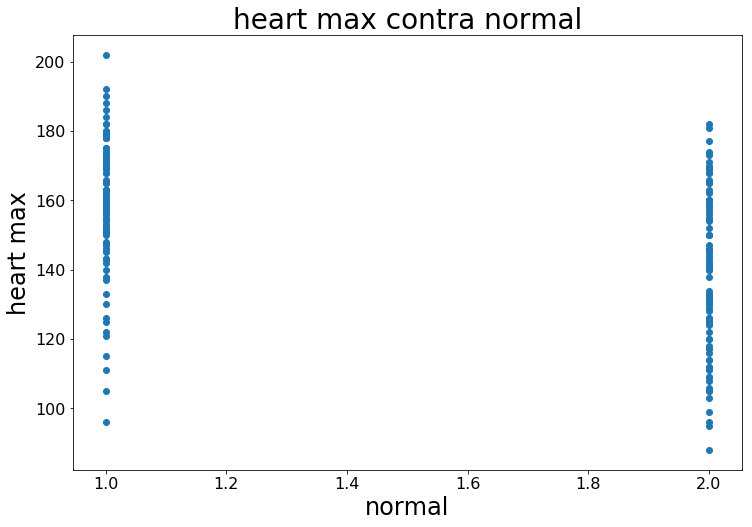

In [74]:
from sklearn.metrics import accuracy_score

media_heart = np.median(ytrain_heart)
predictions_normal=[]
for pred in predictions:
    if(pred>media_heart):
        predictions_normal.append(1)
    else:
        predictions_normal.append(2)

print("Score de limite->mediana: "+str(accuracy_score(ytest_normal,predictions_normal))) 
media_heart = np.median(ytrain_heart)
predictions_normal=[]
for pred in predent:
    if(pred>media_heart):
        predictions_normal.append(1)
    else:
        predictions_normal.append(2)

print("Score de limite->mediana(entrenamiento): "+str(accuracy_score(ytrain_normal,predictions_normal))) 
##########por Region de promedio mas k desviacion estandar##############################################
media_heart = np.mean(ytrain_heart)
desviacion_heart = np.std(ytrain_heart)
k=1 #tamaño del intervalo
cota_inferior_heart = media_heart - k*desviacion_heart
cota_superior_heart = media_heart - k*desviacion_heart

predictions_normal=[]
for pred in predictions:
    if(pred<cota_inferior_heart and pred>cota_superior_heart):
        predictions_normal.append(1)
    else:
        predictions_normal.append(2)

print("Score de limite en region: "+str(accuracy_score(ytest_normal,predictions_normal))) 

media_heart = np.mean(ytrain_heart)
desviacion_heart = np.std(ytrain_heart)
k=1 #tamaño del intervalo
cota_inferior_heart = media_heart - k*desviacion_heart
cota_superior_heart = media_heart - k*desviacion_heart

predictions_normal=[]
for pred in predent:
    if(pred<cota_inferior_heart and pred>cota_superior_heart):
        predictions_normal.append(1)
    else:
        predictions_normal.append(2)

print("Score de limite en region(entrenamiento): "+str(accuracy_score(ytrain_normal,predictions_normal)))
########################################################################################################        
        
##########Esto sirve para comparar y decir que la regresion lineal o escojer a mano es malo#############
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(ytrain_heart.reshape((len(ytrain_normal),1)),ytrain_normal)
n = len(predictions)
predictions_normal = model.predict(predictions.reshape((n,1)))
from sklearn.metrics import accuracy_score
print("Score de LogisticRegression: "+str(accuracy_score(ytest_normal,predictions_normal)))

n = len(predent)
predictions_normal = model.predict(predent.reshape((n,1)))
from sklearn.metrics import accuracy_score
print("Score de LogisticRegression(entrenamiento): "+str(accuracy_score(ytrain_normal,predictions_normal)))
########################################################################################################


plt.figure(figsize=(12,8),facecolor='1.0') 
plt.scatter(ytrain_normal,ytrain_heart)
plt.title("heart max contra normal", size=28)
plt.xlabel("normal", size=24)
plt.ylabel("heart max", size=24)
plt.tick_params(labelsize=16)
plt.show()


<p>La diferencia principal que se presenta en este problema con todo lo anteriormente realizado, es que es un problema de clasificación, no de regresión. El objetivo principal es clasificar a los pacientes como enfermos (2) o sanos (1), pero para lograrlo primero se debe inferir un dato esencial, el máximo ritmo cardíaco del paciente, haciendo uso de todo el resto de sus estadísticas biológicas.</p>
<p>Primero se hizo una regresión lineal cuyo objetivo es el cálculo del máximo ritmo cardíaco, la cual presentó un MSE de 464.659244023. Esto nos indica que el modelo es capaz de hacer conseguir el valor del ritmo con un rango de 20 latidos de distancia con respecto al valor "real" en promedio. Muy probablemente esto se deba a que la cantidad de datos es insuficiente para entrenar un modelo de 11 atributos distintos.</p>
<p>Una vez se tuvo la regresión lineal era necesario fijar un límite desde el cual un paciente se conciderara enfermo, para esto se probo con distintos valores: la mediana, una región en torno a la media y para comparación se utilizo una regresión logistica. Para medir el comportamiento de los modelos de clasificación se ocupó el score Accuracy, es decir, los clasificaciones bien hechas en razón con el total de clasificaciones realizadas. </p>
<p>El peor comportamiento lo presentó la región con un score de prueba aproximado igual a 0.395 y un error de entrenamiento igual a 0.465, esto indica que probablemente el límite no tenga forma de región, al menos no cercano a la media, sino que debe haber sido un valor límite único. Lo anterior queda demostrado al utilizar la mediana, ya que sus scores fueron 0.716 y 0.772, de prueba y entrenamiento respectivamente. Por último la regresión logística tuvo scores de 0.703 para prueba y 0.746 para entrenamiento. Muy probablemente la regresión logística definió un límite cercano a la mediana, razón por la cual tienen comportamientos similares.</p>
<p>Se debe notar que el hecho de que el límite encontrado estuviese en un vecindario de la mediana es puramente incidental, y encontrar dicho valor a mano como lo que se realizó para un modelo más complejo o con muchos más valores no será tan directo. La mejor opción para clasificar en este contexto (de regresiones) sería la regresión logísitca.</p>
<p>Por último se debe mencionar que en la segunda máquina los datos ya entran con un error proveniente de la regresión lineal, por lo que debe amplificar su cantidad de clasificaciones fallidas a raíz de esto.</p>